In [1]:
# importa wordcloud e matplotlib
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from collections import Counter

from datasets import load_dataset
from huggingface_hub import login

os.environ["HUGGING_FACE_HUB_TOKEN"] = ""
login(token=os.environ["HUGGING_FACE_HUB_TOKEN"])

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [2]:
ds = load_dataset("wwbrannon/twinviews-13k")
ds = ds['train']
df = pd.DataFrame(ds)
# ds.to_csv("../data/twinviews-13k.csv", index=False) # Descargar dataset

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc
        if token.is_alpha                # solo palabras (no números o símbolos)
        and not token.is_stop            # sin stopwords
        and len(token) > 2               # al menos 3 letras
    ]
    return " ".join(tokens)

In [ ]:
columns_to_process = ["l", "r"]

for col in columns_to_process:
    df[f"{col}_clean"] = df[col].apply(preprocess_text)

# 1) WordCloud

In [6]:
text_l = " ".join(df["l_clean"].dropna())
text_r = " ".join(df["r_clean"].dropna())

wc_l = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues",
    max_words=100
).generate(text_l)

wc_r = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",
    max_words=100
).generate(text_r)

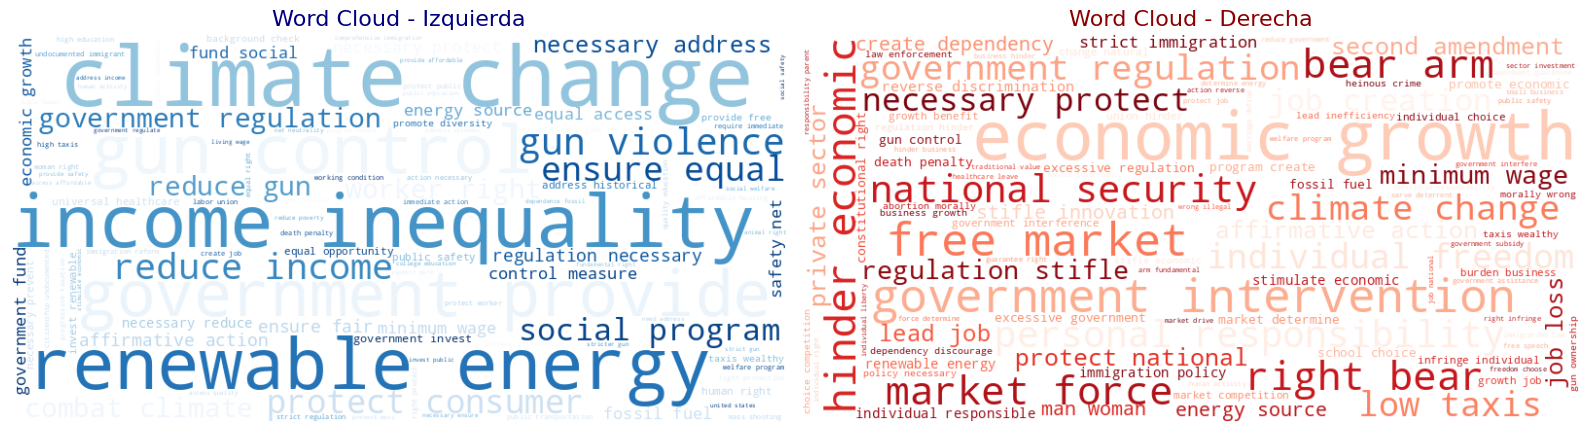

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(wc_l, interpolation="bilinear")
axes[0].set_title("Word Cloud - Izquierda", fontsize=16, color="navy")
axes[0].axis("off")

axes[1].imshow(wc_r, interpolation="bilinear")
axes[1].set_title("Word Cloud - Derecha", fontsize=16, color="darkred")
axes[1].axis("off")

plt.tight_layout()
plt.show()